In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from datetime import timedelta
import glob

# Load API Key and download directory from config file
CONFIG_FILE = "../config/api-call.json"

def load_config(config_path):
    """Load configuration from a JSON file."""
    with open(config_path, "r") as file:
        return json.load(file)

# Load config values
config = load_config(CONFIG_FILE)

# print(config)
DOWNLOAD_DIR = config["ned"]["ned_download_dir"]
print("DOWNLOAD_DIR :", DOWNLOAD_DIR)

DOWNLOAD_DIR : ../data/powergen/


In [ ]:
# df_electricity.index = pd.to_datetime(df_electricity.index)
# df_weather_debilt.index = pd.to_datetime(df_weather_debilt.index)

# merged_df_elec_weather = pd.merge(df_electricity, df_weather_debilt, left_index=True, right_index=True, how='inner')
# df_weather_debilt.reset_index(inplace=True)
# print("Printing df_weather_debilt columns : ", df_weather_debilt.columns)

In [127]:
# Folder where CSV files are stored
# folder_path = f'{DOWNLOAD_DIR}hr-data'  # Update this with your actual path
base_file_path = f'{DOWNLOAD_DIR}hr-data/power-gen-type-2022-2024-'

# Get list of all CSV files in the folder
csv_files = glob.glob(os.path.join(base_file_path, "*.csv"))
# print(csv_files)

# Initialize an empty DataFrame
merged_ned_df = None
file_suffixes = [0, 1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 35, 50, 51]

# Loop through and merge CSV files
# for file in csv_files:
    # Iterate over the file suffixes and merge the data
for suffix in file_suffixes:
    file_path = f'{base_file_path}{suffix}.csv'
    
    # Ensure 'validto' is parsed as datetime
    df_ned = pd.read_csv(file_path)

    df_ned['validto'] = pd.to_datetime(df_ned['validto'], errors='coerce', utc=True)
    df_ned['validfrom'] = pd.to_datetime(df_ned['validfrom'], errors='coerce', utc=True)
    df_ned['lastupdate'] = pd.to_datetime(df_ned['lastupdate'], errors='coerce', utc=True)

    filtered_ned_df = df_ned[['validto', 'capacity', 'volume']]  # List of columns you need

    # Rename the columns to avoid conflicts
    filtered_ned_df = filtered_ned_df.rename(columns={'capacity': f'capacity_{suffix}', 'volume': f'volume_{suffix}'})

    # merged_ned_df = pd.concat([merged_ned_df, df_ned], ignore_index=True)  # Append to merged DataFrame
    if merged_ned_df is None:
        # First iteration: Simply assign df to merged_df
        merged_ned_df = filtered_ned_df
    else:
        # Merge using a common column (e.g., "validto")
        merged_ned_df = pd.merge(merged_ned_df, filtered_ned_df, on='validto', how='outer', suffixes=('_left', '_right'))

    
# Optional: Save merged data to a new CSV file
# merged_ned_df.to_csv("merged_output.csv", index=False)

# Rename the volume columns
merged_ned_df = merged_ned_df.rename(columns={
    'volume_1': 'production_wind', 
    'volume_2': 'production_solar', 
    'volume_4': 'production_heatpump', 
    'volume_8': 'production_cofiring', 
    'volume_9': 'production_geothermal', 
    'volume_10': 'production_other', 
    'volume_11': 'production_waste', 
    'volume_12': 'production_biooil', 
    'volume_13': 'production_biomass', 
    'volume_14': 'production_wood', 
    'volume_17': 'production_windoffshore', 
    'volume_18': 'production_fossilgaspower', 
    'volume_19': 'production_fossilhardcoal', 
    'volume_20': 'production_nuclear', 
    'volume_21': 'production_wastepower', 
    'volume_22': 'production_windoffshoreB', 
    'volume_25': 'production_biomasspower', 
    'volume_26': 'production_otherpower', 
    'volume_27': 'production_electricitymix', 
    'volume_35': 'production_CHP_total', 
    'volume_50': 'production_solarthermal', 
    'volume_51': 'production_allconsuminggas'
})

file_path = os.path.join(DOWNLOAD_DIR, f"power-gen-consolidated-data-2022-2024.csv")  # Change extension as needed
with open(file_path, "wb") as file:
    merged_ned_df.to_csv(file_path, index=False)
    print(f"Consolidated data file saved at : ", file_path)
# print(df_filtered.columns)

Consolidated data file saved at :  ../data/powergen/power-gen-consolidated-data-2022-2024.csv


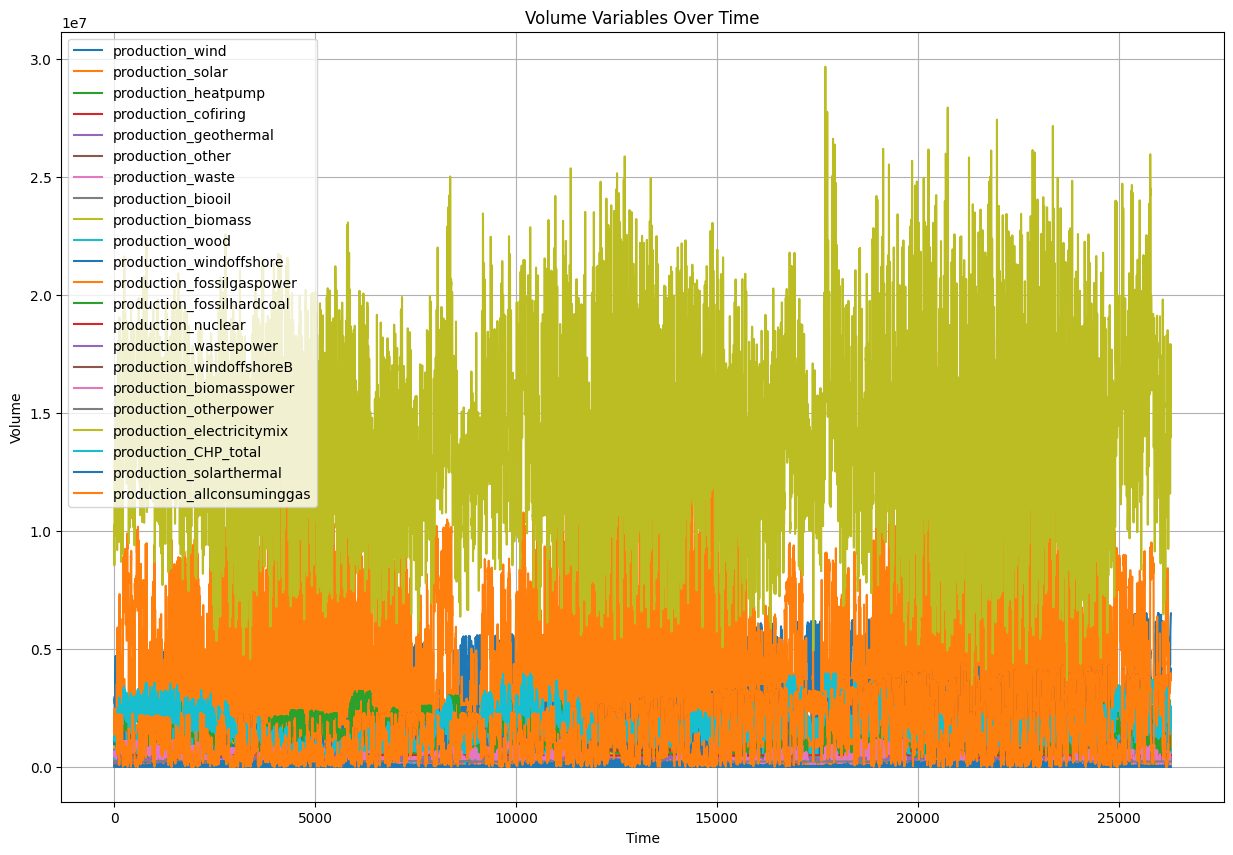

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Select columns that start with "volume"
volume_columns = [
    'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas'
]

# Filter the DataFrame to include only the volume columns
df_volume = merged_ned_df[volume_columns]

# Plot the volume columns
plt.figure(figsize=(15, 10))
for col in df_volume.columns:
    plt.plot(df_volume.index, df_volume[col], label=col)

plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Variables Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
'''

plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Total_Flow'], df_filtered['wind_speed_10m'], s=1, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Total_Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Total_Flow vs Wind Speed')
plt.grid(True)
plt.show()
'''

"\n\nplt.figure(figsize=(10, 5))\nplt.scatter(df_filtered['Total_Flow'], df_filtered['wind_speed_10m'], s=1, alpha=0.5)  # Adjust 's' for point size\nplt.xlabel('Total_Flow')\nplt.ylabel('Wind Speed')\nplt.title('Scatter Plot of Total_Flow vs Wind Speed')\nplt.grid(True)\nplt.show()\n"

In [43]:
'''
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['wind_speed_10m'], df_filtered['production_wind'], s=5, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Wind Speed')
plt.ylabel('Wind Energy Production')
plt.title('Scatter Plot of Wind Speed vs Wind Energy')
plt.grid(True)
plt.show()
'''

"\nplt.figure(figsize=(10, 5))\nplt.scatter(df_filtered['wind_speed_10m'], df_filtered['production_wind'], s=5, alpha=0.5)  # Adjust 's' for point size\nplt.xlabel('Wind Speed')\nplt.ylabel('Wind Energy Production')\nplt.title('Scatter Plot of Wind Speed vs Wind Energy')\nplt.grid(True)\nplt.show()\n"

In [44]:
'''
import numpy as np

merged_ned_df = df_filtered


# Drop rows with missing values in 'Price' or 'Load' columns
df_filtered_ws = df_filtered[['production_wind', 'wind_speed_10m']].dropna()

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered_ws['production_wind'], df_filtered_ws['wind_speed_10m'])
print("Correlation coefficient matrix:")
print(r)
'''

'\nimport numpy as np\n\nmerged_ned_df = df_filtered\n\n\n# Drop rows with missing values in \'Price\' or \'Load\' columns\ndf_filtered_ws = df_filtered[[\'production_wind\', \'wind_speed_10m\']].dropna()\n\n# Calculate the correlation coefficient\nr = np.corrcoef(df_filtered_ws[\'production_wind\'], df_filtered_ws[\'wind_speed_10m\'])\nprint("Correlation coefficient matrix:")\nprint(r)\n'

In [45]:
'''
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for 'diffuse_radiation'
axs[0].scatter(df_filtered['diffuse_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[0].set_xlabel('Diffuse Radiation')
axs[0].set_ylabel('Solar Energy Production')
axs[0].set_title('Scatter Plot of Diffuse Radiation vs Solar Energy Production')
axs[0].grid(True)

# Scatter plot for 'direct_normal_irradiance'
axs[1].scatter(df_filtered['direct_normal_irradiance'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[1].set_xlabel('Direct Normal Irradiance')
axs[1].set_ylabel('Solar Energy Production')
axs[1].set_title('Scatter Plot of Direct Normal Irradiance vs Solar Energy Production')
axs[1].grid(True)

# Scatter plot for 'shortwave_radiation'
axs[2].scatter(df_filtered['shortwave_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[2].set_xlabel('Shortwave Radiation')
axs[2].set_ylabel('Solar Energy Production')
axs[2].set_title('Scatter Plot of Shortwave Radiation vs Solar Energy Production')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Create a figure and a set of subplots\nfig, axs = plt.subplots(1, 3, figsize=(15, 5))\n\n# Scatter plot for 'diffuse_radiation'\naxs[0].scatter(df_filtered['diffuse_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)\naxs[0].set_xlabel('Diffuse Radiation')\naxs[0].set_ylabel('Solar Energy Production')\naxs[0].set_title('Scatter Plot of Diffuse Radiation vs Solar Energy Production')\naxs[0].grid(True)\n\n# Scatter plot for 'direct_normal_irradiance'\naxs[1].scatter(df_filtered['direct_normal_irradiance'], df_filtered['production_solar'], s=5, alpha=0.5)\naxs[1].set_xlabel('Direct Normal Irradiance')\naxs[1].set_ylabel('Solar Energy Production')\naxs[1].set_title('Scatter Plot of Direct Normal Irradiance vs Solar Energy Production')\naxs[1].grid(True)\n\n# Scatter plot for 'shortwave_radiation'\naxs[2].scatter(df_filtered['shortwave_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)\naxs[2].set_xlabel('Shortwave Radiation')\nax

The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.


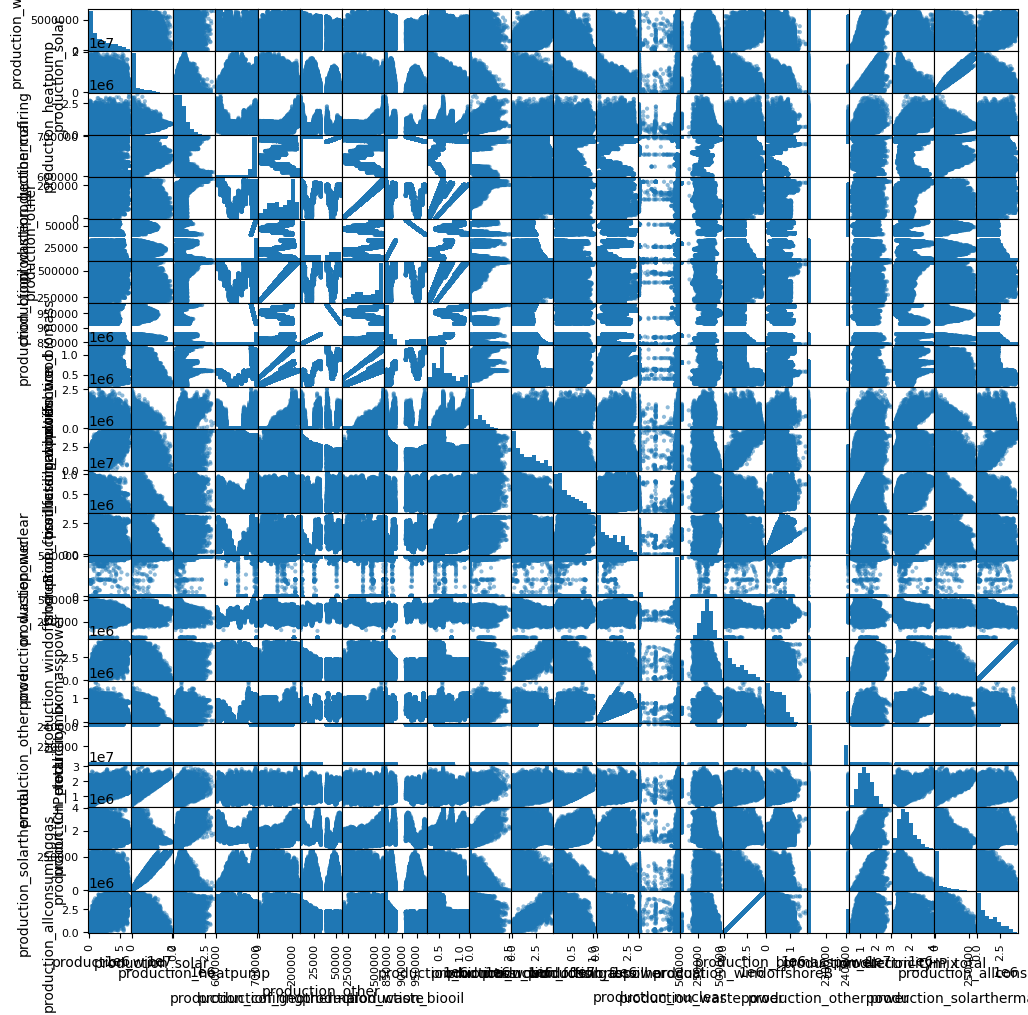

In [129]:
import pandas as pd
import plotly.express as px

# print(merged_ned_df.columns)

# Select the desired columns
selected_columns = [
    'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas'
]

df_filtered = merged_ned_df 

df_filtered['Total'] = df_filtered[selected_columns].sum(axis=1)

# Filter the DataFrame to include only the selected columns
df_selected = df_filtered[selected_columns]

# Select only the numerical columns
df_numeric = df_selected.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create an interactive heatmap with Plotly
fig = px.imshow(corr_matrix, 
                labels=dict(color="Correlation"), 
                x=corr_matrix.columns, 
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1)

fig.update_layout(title='Correlation Matrix', width=800, height=800)

# Save the figure as an HTML file
fig.write_html("correlation_matrix.html")

# Display a message to the user
print("The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.")

# Creating a scatterplot matrix using Pandas
pd.plotting.scatter_matrix(df_selected, figsize=(12, 12), diagonal='hist')

# Show plot
plt.show()

In [80]:
'''
# Define a color map for the variables
colors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors

# Plot the scatter plot with different colors for each variable
plt.figure(figsize=(10, 5))
plt.scatter(1`['Flow_DE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(0), label='Flow_DE')
plt.scatter(df_filtered['Flow_DK'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(1), label='Flow_DK')
plt.scatter(df_filtered['Flow_BE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(2), label='Flow_BE')
plt.scatter(df_filtered['Flow_GB'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(3), label='Flow_GB')
plt.scatter(df_filtered['Flow_NO'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(4), label='Flow_NO')

plt.xlabel('Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Flow vs Wind Speed')
plt.legend(title='Variable')
plt.grid(True)
plt.show()
'''

"\n# Define a color map for the variables\ncolors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors\n\n# Plot the scatter plot with different colors for each variable\nplt.figure(figsize=(10, 5))\nplt.scatter(1`['Flow_DE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(0), label='Flow_DE')\nplt.scatter(df_filtered['Flow_DK'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(1), label='Flow_DK')\nplt.scatter(df_filtered['Flow_BE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(2), label='Flow_BE')\nplt.scatter(df_filtered['Flow_GB'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(3), label='Flow_GB')\nplt.scatter(df_filtered['Flow_NO'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(4), label='Flow_NO')\n\nplt.xlabel('Flow')\nplt.ylabel('Wind Speed')\nplt.title('Scatter Plot of Flow vs Wind Speed')\nplt.legend(title='Variable')\nplt.grid(True)\nplt.show()\n"

In [81]:
'''
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
print(nan_totalflow)
nan_temp = df_filtered['temperature_2m'].isna().sum()
print(nan_temp)
nan_cloud = df_filtered['cloud_cover'].isna().sum()
print(nan_cloud)
'''

"\nnan_totalflow = df_filtered['Total_Flow'].isna().sum()\nprint(nan_totalflow)\nnan_temp = df_filtered['temperature_2m'].isna().sum()\nprint(nan_temp)\nnan_cloud = df_filtered['cloud_cover'].isna().sum()\nprint(nan_cloud)\n"

Mean Squared Error: 7.877546551169162e-17
R^2 Score: 1.0
                            Coefficient
production_wind                     1.0
production_solar                    1.0
production_heatpump                 1.0
production_cofiring                 1.0
production_geothermal               1.0
production_other                    1.0
production_waste                    1.0
production_biooil                   1.0
production_biomass                  1.0
production_wood                     1.0
production_windoffshore             1.0
production_fossilgaspower           1.0
production_fossilhardcoal           1.0
production_nuclear                  1.0
production_wastepower               1.0
production_windoffshoreB            1.0
production_biomasspower             1.0
production_otherpower               1.0
production_electricitymix           1.0
production_CHP_total                1.0
production_solarthermal             1.0
production_allconsuminggas          1.0


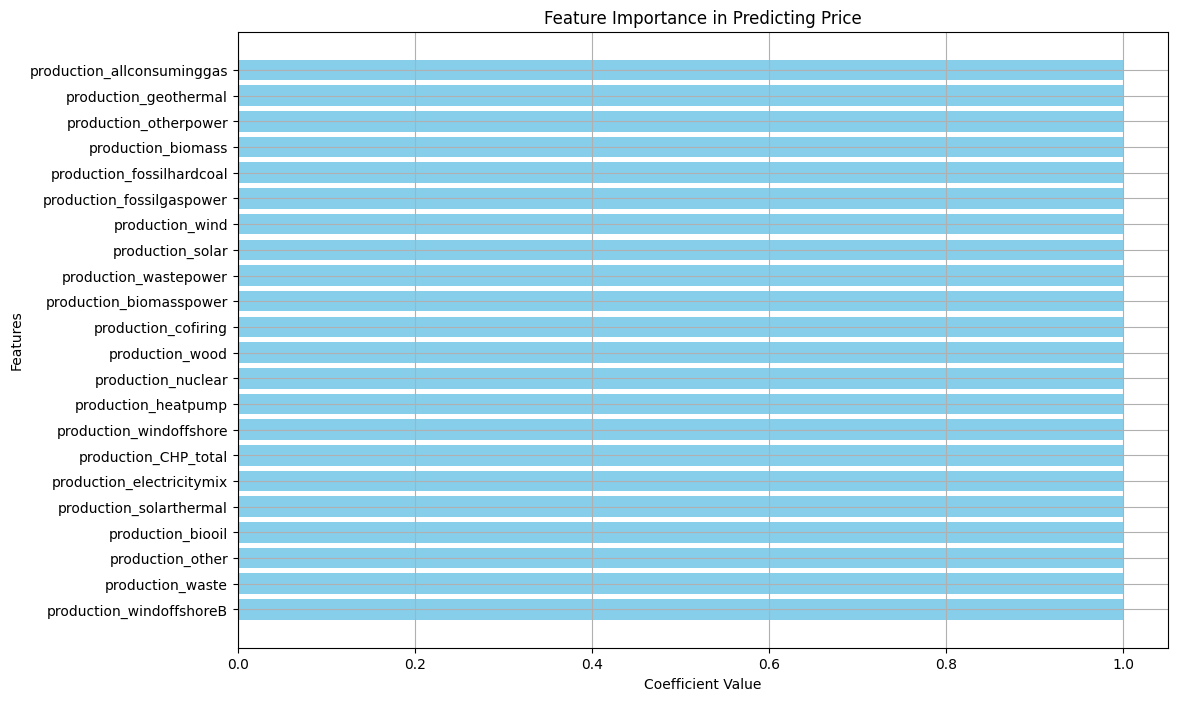

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values in the relevant columns
df_filtered_regr = df_filtered[['Total', 'production_wind', 'production_solar', 'production_heatpump', 
    'production_cofiring', 'production_geothermal', 'production_other', 'production_waste', 'production_biooil', 'production_biomass', 'production_wood', 
    'production_windoffshore', 'production_fossilgaspower', 'production_fossilhardcoal', 'production_nuclear', 'production_wastepower', 'production_windoffshoreB', 
    'production_biomasspower', 'production_otherpower', 'production_electricitymix', 'production_CHP_total', 'production_solarthermal', 
    'production_allconsuminggas']].dropna()

# Check if the DataFrame is empty
if df_filtered_regr.empty:
    print("The DataFrame is empty after dropping rows with missing values.")
else:
    # Define the features (X) and the target (y)
    X = df_filtered_regr[['production_wind', 'production_solar', 'production_heatpump', 'production_cofiring', 'production_geothermal', 
    'production_other', 'production_waste', 'production_biooil', 'production_biomass', 'production_wood', 'production_windoffshore', 'production_fossilgaspower', 
    'production_fossilhardcoal', 'production_nuclear', 'production_wastepower', 'production_windoffshoreB', 'production_biomasspower', 'production_otherpower', 
    'production_electricitymix', 'production_CHP_total', 'production_solarthermal', 'production_allconsuminggas']]
    y = df_filtered_regr['Total']

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions on the same dataset
    y_pred = model.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Get the coefficients of the model
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)

        # Sort the coefficients by absolute value
    coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='abs_coefficient', ascending=True)

    # Plot the coefficients
    plt.figure(figsize=(12, 8))
    plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title('Feature Importance in Predicting Price')
    plt.grid(True)
    plt.show()



To plot the residuals

In [135]:
df_filtered_regr.head

<bound method NDFrame.head of           Total  production_wind  production_solar  production_heatpump  \
0      27356962          2031015                 0               161795   
1      26938533          1864849                 0               198870   
2      25625865          1784513                 0               222172   
3      24413196          1874074                 0               239482   
4      23932535          1711229                 0               254317   
...         ...              ...               ...                  ...   
26299  42375950          6375458                 0              1001481   
26300  41512334          6448966                 0               985098   
26301  41166931          6472458                 0               973579   
26302  40696878          6486790                 0              1005140   
26303  40381524          6499171                 0              1085576   

       production_cofiring  production_geothermal  production_other  

NameError: name 'y_test' is not defined